Sigma: 2.0 | nu: 3.5 | correlation scale: 150.0
E anal: 989464.187903 991613.465466
Var anal: 3.99842928544
E calc: (991613.465466+0j) (989464.187903+0j)


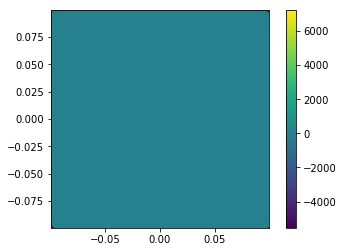

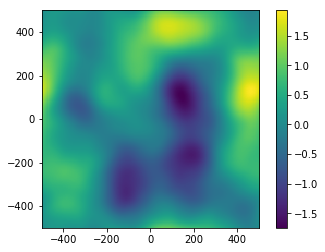

1.83329066877
Fluctuations: 1.48729149784


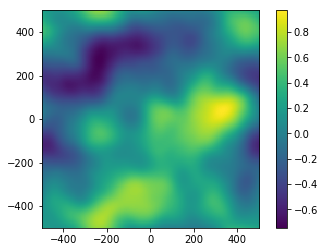

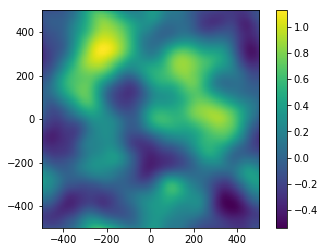

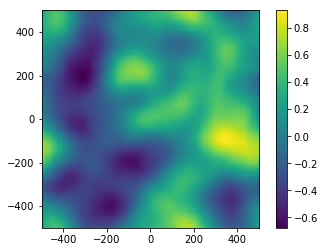

In [64]:
import numpy as np
import pylab as plt
from scipy.special import gamma, kv
from scipy.signal import convolve2d
from scipy.integrate import simps
np.random.seed(1234)
n = 2
sigma = 2.
nu = 7./2.
corr = 150.
alpha = 1./corr
phi = sigma**2 * alpha**(2.*nu)

print("Sigma: {} | nu: {} | correlation scale: {}".format(sigma,nu,corr))
    
N = 200
x = np.linspace(-0.5,0.5,N)*1000

dx = x[1] - x[0]
df = 1./(N*dx)
V = (x[-1] - x[0])**n
X,Y = np.meshgrid(x,x,indexing='ij')
xabs = np.sqrt(X**2 + Y**2)
lvec = np.fft.fftfreq(N,d = dx)
L,M = np.meshgrid(lvec,lvec,indexing='ij')
r = np.sqrt(L**2 + M**2)

C = sigma**2*2**(1-nu)/gamma(nu)*(np.sqrt(2*nu)*xabs/corr)**nu * kv(nu,np.sqrt(2*nu)*xabs/corr)
f = sigma**2*2**(n) * np.pi**(n/2.) * gamma(nu+n/2.) * (2*nu)**(nu) / gamma(nu) / corr**(2*nu) * (2*nu/corr**2 + 4*np.pi**2*r**2)**(-nu - n/2.)
print("E anal:",np.sum(C*np.conjugate(C))*dx**n,
      np.sum(f*np.conjugate(f))*df**n)
#print(np.sum(f*np.conjugate(f))*df**n/(np.sum(C*np.conjugate(C))*dx**n))
print("Var anal:",np.max(C))
E = np.sqrt(np.sum(f*np.conjugate(f))*df**n)


C_ = np.fft.fftshift(np.fft.ifftn(f))/dx**n
f_ = np.fft.fftshift(np.fft.fftn(np.fft.ifftshift(C))*dx**n)
print("E calc:",np.sum(C_*np.conjugate(C_))*dx**n,
      np.sum(f_*np.conjugate(f_))*df**n)

B = np.random.normal(size=[N,N])
A = np.fft.fftn(B)
A *= np.sqrt(f/(dx)**n)/2**(1.5)#(7.*n/8. - 0.25)
plt.imshow(A.real,extent=(-df*(N>>1),df*(N>>1),-df*(N>>1),df*(N>>1)))
plt.colorbar()
plt.show()

B = (np.fft.ifftn(A)).real#*dx**n

plt.imshow(B,extent=(x[0],x[-1],x[0],x[-1]))
plt.colorbar()
plt.show()

print((np.max(B) + np.max(-B))/2.)
# plt.imshow(C,extent=(x[0],x[-1],x[0],x[-1]))
# plt.colorbar()
# plt.show()
# plt.imshow(np.fft.ifftshift(f),extent=(-df*(N>>1),df*(N>>1),-df*(N>>1),df*(N>>1)))
# plt.colorbar()
# plt.show()

# plt.imshow(C_.real,extent=(x[0],x[-1],x[0],x[-1]))
# plt.colorbar()
# plt.show()
# plt.imshow(f_.real,extent=(-df*(N>>1),df*(N>>1),-df*(N>>1),df*(N>>1)))
# plt.colorbar()
# plt.show()

# plt.imshow(C_,extent=(x[0],x[-1],x[0],x[-1]))
# plt.colorbar()
# plt.show()
# plt.imshow(f,extent=(lvec[0],lvec[-1],lvec[0],lvec[-1]))
# plt.colorbar()
# plt.show()

    
def realization():
    n = 3
    V = (x[-1] - x[0])**n
    dV = np.abs(x[1]-x[0])**n
    lvec = np.fft.fftfreq(N,d = x[1] - x[0])
    B = np.random.normal(size=[N,N,N])
    A = np.fft.fftn(B)
    L,M,O = np.meshgrid(lvec,lvec,lvec,indexing='ij')
    r = np.sqrt(L**2 + M**2 + O**2)

    f = sigma**2*2**(n) * np.pi**(n/2.) * gamma(nu+n/2.) * (2*nu)**(nu) / gamma(nu) / corr**(2*nu) * (2*nu/corr**2 + 4*np.pi**2*r**2)**(-nu - n/2.)
    
    A *= np.sqrt(f/(dx)**n)/4.#2**(n-1)
    B = np.fft.fftshift(np.fft.ifftn(A)).real
    #print(lvec[1] - lvec[0])
    #B *= theta1/np.max(B)

#     print(np.max(B))
#     print("Theta1: ",np.std(B.flatten()))
    return B

B = realization()
print("Fluctuations:",(np.max(B) + np.max(-B))/2.)
#xy slice
plt.imshow(B[N>>1,:,:],extent=(x[0],x[-1],x[0],x[-1]))
plt.colorbar()
plt.show()
plt.imshow(B[:,N>>1,:],extent=(x[0],x[-1],x[0],x[-1]))
plt.colorbar()
plt.show()
plt.imshow(B[:,:,N>>1],extent=(x[0],x[-1],x[0],x[-1]))
plt.colorbar()
plt.show()

# plt.imshow(np.mean(B,axis=0),extent=(x[0],x[-1],x[0],x[-1]))
# plt.colorbar()
# plt.show()
# plt.imshow(np.mean(B,axis=1),extent=(x[0],x[-1],x[0],x[-1]))
# plt.colorbar()
# plt.show()
# plt.imshow(np.mean(B,axis=2),extent=(x[0],x[-1],x[0],x[-1]))
# plt.colorbar()
# plt.show()